<a href="https://colab.research.google.com/github/Nao-Ishi/pray_py/blob/master/3pitch_manu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install pillow

# やること
- pyplot.animationとpillowでgif生成
- マニピュレータの逆運動学を解く（大嘘）

# アニメーションの練習
- そもそもpyplotもよくしらん

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.animation import PillowWriter
import math

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  
No handles with labels found to put in legend.


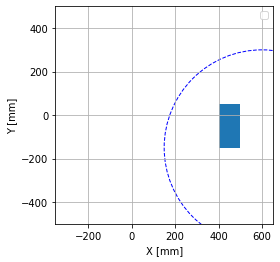

In [69]:
import matplotlib.patches as patches
#キャンパス設定

fig = plt.figure()
plt.cla()
ax = fig.add_subplot(111)

Mx=650
mx=-350
My=500
my=-500

ax.set_xlim(mx,Mx)
ax.set_ylim(my,My)
ax.set_aspect('equal')

ax.set_xlabel('X [mm]')
ax.set_ylabel('Y [mm]')

ax.grid(True)

ax.legend()



c = patches.Circle(xy=(600, -150), radius=450, ec='b', ls='--',fill=False)
r = patches.Rectangle(xy=(400, -150), width=100.0, height=200.0)
ax.add_patch(c)
ax.add_patch(r)


step_test = ax.plot(0.05,0.9,'',transform=ax.transAxes)
plt.show()

In [0]:
T = np.arange(130.0,195.0)
tag, = ax.plot([0], [0], 'ro')
p1, = ax.plot([0], [0], 'bo')
p2, = ax.plot([0], [0], 'go')
l1, = ax.plot([0, 0], [0, 0], 'g')
l2, = ax.plot([0, 0], [0, 0], 'r')
L1 = 150
L2 = 250
PI = np.pi

def draw_ani(t):
    at = np.radians(T[t])
    xt = np.cos(at)*450+600
    yt = np.sin(at)*450-150
    ##########################
    #https://so-zou.jp/robot/tech/kinematics/inverse-kinematics.htm#
    alpha = np.arccos(
        ((-1)*(xt*xt+yt*yt)+L2*L2+L1*L1)
        /(2*L1*L2)
    )
    
    beta = np.arccos(
        ((-1)*(L2*L2)+(L1*L1)+(xt*xt+yt*yt))
        /(2*L1*np.sqrt(xt*xt+yt*yt))
    )
    sheta1 = np.arctan(yt/xt)-beta
    sheta2 = (PI - alpha)
    ##########################
    xp1 = np.cos(sheta1)*L1
    yp1 = np.sin(sheta1)*L1
    p1.set_data(xp1,yp1)
    ##########################
    tag.set_data(xt, yt)
    l1.set_data([0,xp1],[0,yp1])
    l2.set_data([xp1,xt],[yp1,yt])
    return tag, p1, p2, l1, l2
  
ani = animation.FuncAnimation(
      fig,  # Figureオブジェクト
      draw_ani,  # グラフ描画関数
      frames = len(T),  # フレームを設定
      interval = 100,  # 更新間隔(ms)
      repeat = True,  # 描画を繰り返す
      blit = True  # blitting による処理の高速化
      )

ani.save('normaldist_kde_anim.gif', writer='pillow')

In [37]:
T = np.arange(150,210,0.5)
print(T[0])

150.0
